In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('./mental_health.sqlite')

# Read the data from a table


   Year  userCount
0  2014       1260
1  2016       1433
2  2017        756
3  2018        417
4  2019        352


<Axes: xlabel='Year'>

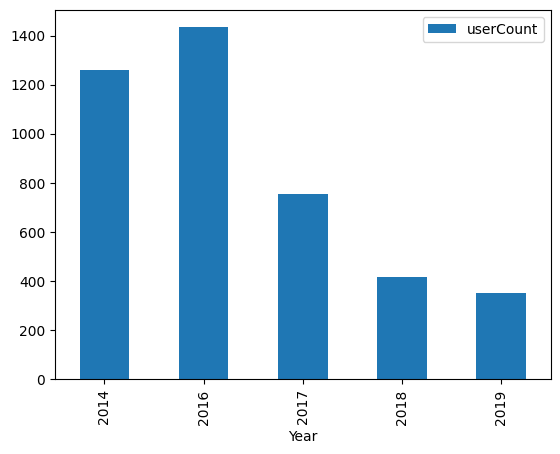

In [63]:
query = "SELECT surveyid AS Year, COUNT(DISTINCT(userid)) AS userCount FROM answer GROUP BY surveyid;"
#pd.read_sql_query(query, conn)  
result = pd.read_sql_query(query, conn)
print(result)
result.plot(x='Year', y='userCount', kind='bar')


   Year  questionCount
0  2014             26
1  2016             60
2  2017             76
3  2018             76
4  2019             76


<Axes: xlabel='Year'>

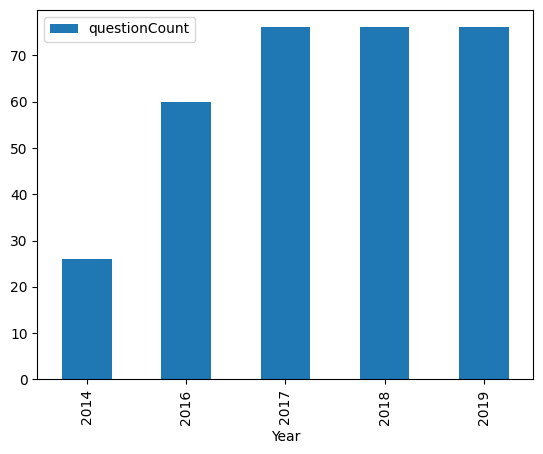

In [16]:
query = "SELECT surveyid AS Year, COUNT(DISTINCT(questionid)) AS questionCount FROM answer GROUP BY surveyid;"
result = pd.read_sql_query(query, conn)
print(result)
result.plot(x='Year', y='questionCount', kind='bar')


- Link between the number of questions and asnwers
- ~60 questions seems to be the number
- Responses going down -> Employees have less issues to report regarding mental health?
- Was there no survey in 2015? If so is that why there were more responses in 2016

In [17]:
query = "SELECT userid, COUNT(DISTINCT surveyid) AS retakeCount FROM answer GROUP BY userid HAVING retakeCount > 1;"
result = pd.read_sql_query(query, conn)
num_retaken_users = len(result)
print("Number of users that have retaken the survey:", num_retaken_users)


Number of users that have retaken the survey: 0


In [73]:
query = "SELECT questionid, questionText FROM question;"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)

pd.read_sql_query(query, conn)
 


,questionid,questiontext
0,1,What is your age?
1,2,What is your gender?
2,3,What country do you live in?
3,4,"If you live in the United States, which state or territory do you live in?"
4,5,Are you self-employed?
5,6,Do you have a family history of mental illness?
6,7,Have you ever sought treatment for a mental health disorder from a mental health professional?
7,8,How many employees does your company or organization have?
8,9,Is your employer primarily a tech company/organization?
9,10,Does your employer provide mental health benefits as part of healthcare coverage?


Text(0.5, 1.0, 'Q94: Do you know the options for mental health care your employer provides?')

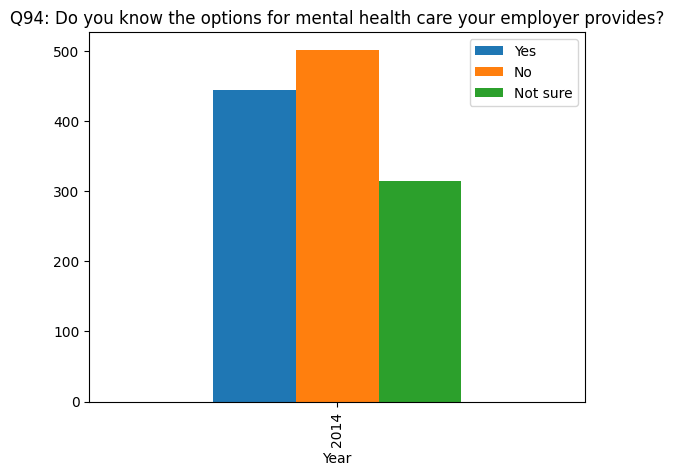

In [76]:

query = """ SELECT SurveyID AS Year, COUNT(CASE WHEN AnswerText = "Yes" THEN 1 END) AS Yes,
                             COUNT(CASE WHEN AnswerText = "No" THEN 1 END) AS No,
                                COUNT(CASE WHEN AnswerText = "Not sure" THEN 1 END) AS "Not sure"
            FROM answer WHERE questionid = 94 GROUP BY SurveyID;"""
result = pd.read_sql_query(query, conn)
ax = result.plot(x='Year', y=['Yes', 'No','Not sure'], kind='bar')
ax.set_title("Q94: Do you know the options for mental health care your employer provides?")



Text(0.5, 1.0, 'Q14: Do you know the options for mental health care available under your employer-provided health coverage?')

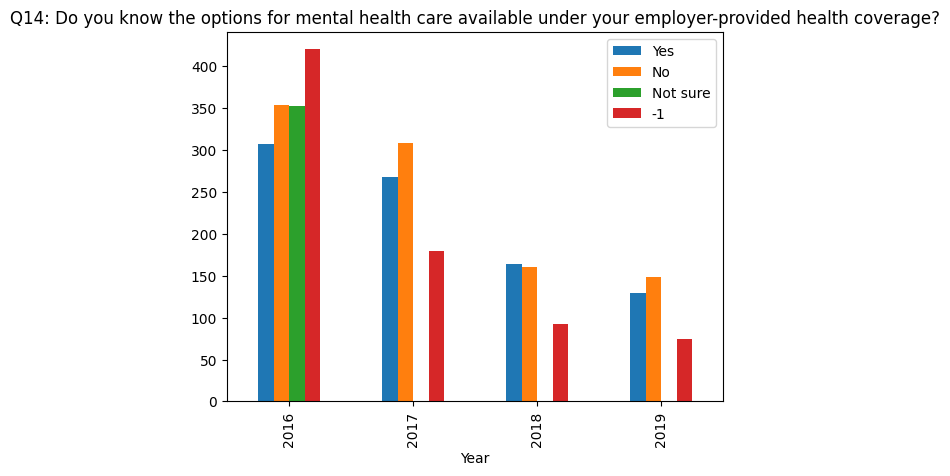

In [94]:

query = "SELECT DISTINCT answerText FROM answer WHERE questionid = 14;"
result = pd.read_sql_query(query, conn)
#print(result)
query = """ SELECT SurveyID AS Year, COUNT(CASE WHEN AnswerText = "Yes" THEN 1 END) AS Yes,
                             COUNT(CASE WHEN AnswerText = "No" THEN 1 END) AS No,
                             COUNT(CASE WHEN AnswerText = "I am not sure" THEN 1 END) AS "Not sure",
                             COUNT(CASE WHEN AnswerText = "-1" THEN 1 END) AS "-1"
            FROM answer WHERE questionid = 14 GROUP BY SurveyID;"""
result = pd.read_sql_query(query, conn)
ax = result.plot(x='Year', y=['Yes', 'No','Not sure',"-1"], kind='bar')
ax.set_title("Q14: Do you know the options for mental health care available under your employer-provided health coverage?")

- Almost in every year half the people do not what mental health support they have

In [46]:
query = "SELECT questionid, questionText FROM question WHERE questionText LIKE '%discuss%';"
pd.read_sql_query(query, conn)


,questionid,questiontext
0,15,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
1,18,Would you feel comfortable discussing a mental health issue with your coworkers?
2,19,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
3,25,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
4,28,Would you have been willing to discuss your mental health with your direct supervisor(s)?
5,31,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
6,58,Have you ever discussed your mental health with your employer?
7,60,Have you ever discussed your mental health with coworkers?
8,62,Have you ever had a coworker discuss their or another coworker's mental health with you?
9,70,Did you ever discuss your mental health with your previous employer?


In [83]:
question_ids = [18, 19,31,74,104, 108, 110]
query = f"SELECT questionid, questionText FROM question WHERE questionid IN ({', '.join(map(str, question_ids))});"
pd.read_sql_query(query, conn)



pd.read_sql_query(query, conn)

,questionid,questiontext
0,18,Would you feel comfortable discussing a mental health issue with your coworkers?
1,19,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
2,31,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
3,74,Did you ever have a previous coworker discuss their or another coworker's mental health with you?
4,104,Do you think that discussing a mental health disorder with your employer would have negative consequences?
5,108,Do you think that discussing a mental health disorder with previous employers would have negative consequences?
6,110,Would you have been willing to discuss a mental health issue with your previous co-workers?


  AnswerText
0      Maybe
1         -1
2        Yes
3         No
2014       1260
2016       1433
2017        756
2018        417
2019        352
   Year  Yes   No  Maybe   -1
0  2016  275  392    479  287
1  2017  206  152    285  113
2  2018  112   88    161   56
3  2019   89   87    128   48


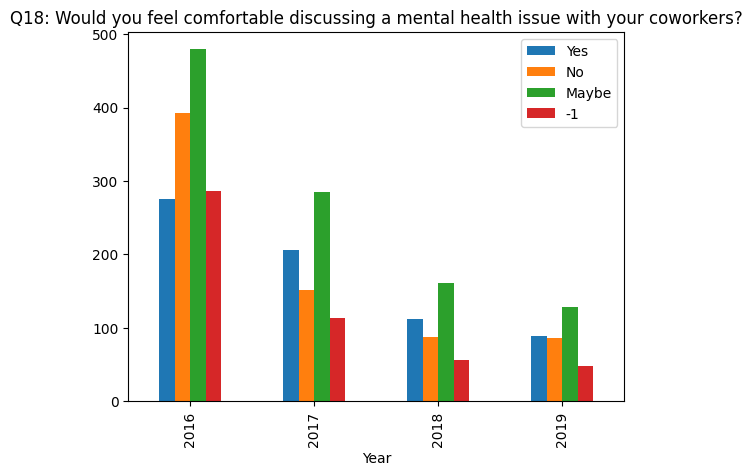

In [79]:
query = f"SELECT answerText,questionid id FROM answer WHERE questionid =18;"
query = "SELECT DISTINCT answerText FROM answer WHERE questionid = 18;"
result = pd.read_sql_query(query, conn)
print(result)
query = """ SELECT SurveyID AS Year, COUNT(CASE WHEN AnswerText = "Yes" THEN 1 END) AS Yes,
                             COUNT(CASE WHEN AnswerText = "No" THEN 1 END) AS No,
                             COUNT(CASE WHEN AnswerText = "Maybe" THEN 1 END) AS "Maybe",
                             COUNT(CASE WHEN AnswerText = "-1" THEN 1 END) AS "-1"
            FROM answer WHERE questionid = 18 GROUP BY SurveyID;"""
result = pd.read_sql_query(query, conn)
ax = result.plot(x='Year', y=['Yes', 'No','Maybe','-1'], kind='bar')
ax.set_title("Q18: Would you feel comfortable discussing a mental health issue with your coworkers?")
# Calculate the percentages for each answer type
print("2014       1260\n2016       1433\n2017        756\n2018        417\n2019        352")
# Print the updated result dataframe
print(result)


2014       1260
2016       1433
2017        756
2018        417
2019        352
   Year  Yes   No  Maybe   -1
0  2016  428  336    382  287
1  2017  256  166    221  113
2  2018  131  113    117   56
3  2019  117   92     95   48


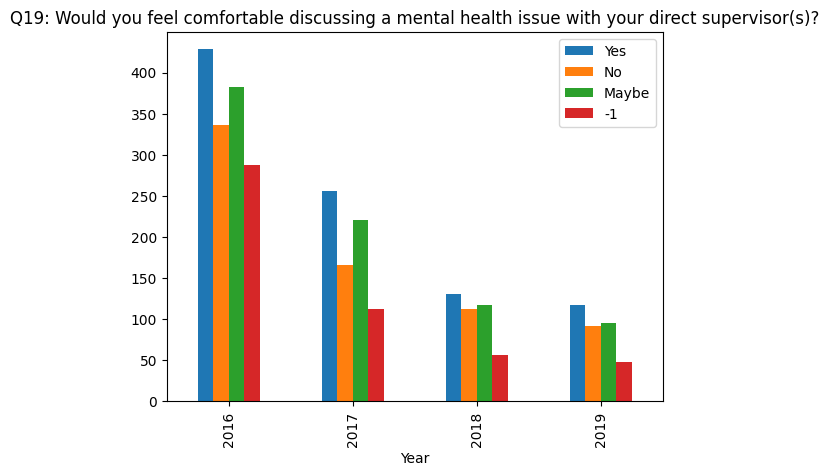

In [72]:
query = f"SELECT answerText,questionid id FROM answer WHERE questionid =19;"
query = "SELECT DISTINCT answerText FROM answer WHERE questionid = 19;"
result = pd.read_sql_query(query, conn)
#print(result)
query = """ SELECT SurveyID AS Year, COUNT(CASE WHEN AnswerText = "Yes" THEN 1 END) AS Yes,
                             COUNT(CASE WHEN AnswerText = "No" THEN 1 END) AS No,
                             COUNT(CASE WHEN AnswerText = "Maybe" THEN 1 END) AS "Maybe",
                             COUNT(CASE WHEN AnswerText = "-1" THEN 1 END) AS "-1"
            FROM answer WHERE questionid = 19 GROUP BY SurveyID;"""
result = pd.read_sql_query(query, conn)
ax = result.plot(x='Year', y=['Yes', 'No','Maybe','-1'], kind='bar')
ax.set_title("Q19: Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?")
# Calculate the percentages for each answer type
print("2014       1260\n2016       1433\n2017        756\n2018        417\n2019        352")
# Print the updated result dataframe
print(result)

 - More employees answered yes when its about talking with the supervisor rather than other co workers.

2014       1260
2016       1433
2017        756
2018        417
2019        352
   Year  Yes   No  Maybe   -1
0  2016  221  438    487  287


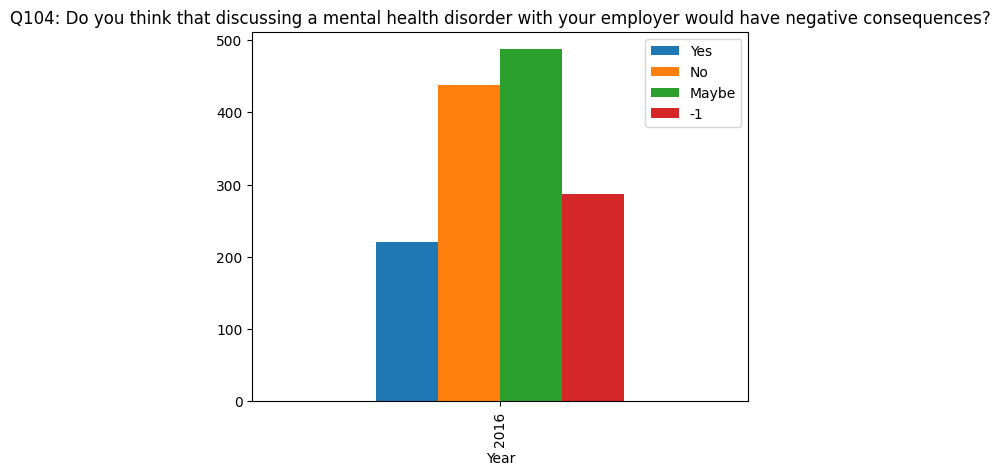

In [82]:
query = f"SELECT answerText,questionid id FROM answer WHERE questionid =104;"
query = "SELECT DISTINCT answerText FROM answer WHERE questionid = 104;"
result = pd.read_sql_query(query, conn)
#print(result)
query = """ SELECT SurveyID AS Year, COUNT(CASE WHEN AnswerText = "Yes" THEN 1 END) AS Yes,
                             COUNT(CASE WHEN AnswerText = "No" THEN 1 END) AS No,
                             COUNT(CASE WHEN AnswerText = "Maybe" THEN 1 END) AS "Maybe",
                             COUNT(CASE WHEN AnswerText = "-1" THEN 1 END) AS "-1"
            FROM answer WHERE questionid = 104 GROUP BY SurveyID;"""
result = pd.read_sql_query(query, conn)
ax = result.plot(x='Year', y=['Yes', 'No','Maybe','-1'], kind='bar')
ax.set_title("Q104: Do you think that discussing a mental health disorder with your employer would have negative consequences?")
# Calculate the percentages for each answer type
print("2014       1260\n2016       1433\n2017        756\n2018        417\n2019        352")
# Print the updated result dataframe
print(result)

 - Majority think that speaking about mental health may cause issues

2014       1260
2016       1433
2017        756
2018        417
2019        352
   Year  Yes   No  Maybe   -1
0  2016  246  234    177  776
1  2017  108  361    127  160
2  2018   63  200     57   97
3  2019   65  173     44   70


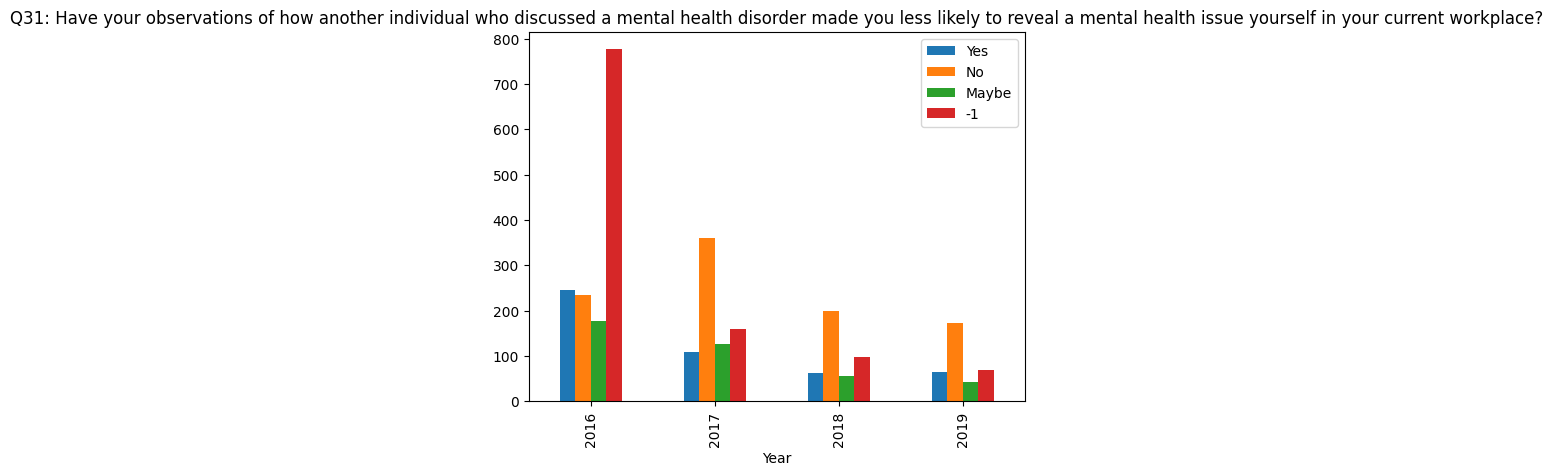

In [87]:
query = f"SELECT answerText,questionid id FROM answer WHERE questionid =31;"
query = "SELECT DISTINCT answerText FROM answer WHERE questionid = 31;"
result = pd.read_sql_query(query, conn)
#print(result)
query = """ SELECT SurveyID AS Year, COUNT(CASE WHEN AnswerText = "Yes" THEN 1 END) AS Yes,
                             COUNT(CASE WHEN AnswerText = "No" THEN 1 END) AS No,
                             COUNT(CASE WHEN AnswerText = "Maybe" THEN 1 END) AS "Maybe",
                             COUNT(CASE WHEN AnswerText = "-1" THEN 1 END) AS "-1"
            FROM answer WHERE questionid = 31 GROUP BY SurveyID;"""
result = pd.read_sql_query(query, conn)
ax = result.plot(x='Year', y=['Yes', 'No','Maybe','-1'], kind='bar')
ax.set_title("Q31: Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?")
# Calculate the percentages for each answer type
print("2014       1260\n2016       1433\n2017        756\n2018        417\n2019        352")
# Print the updated result dataframe
print(result)